In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import datetime

In [2]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings['enddate'] = pd.to_datetime(trump_ratings['enddate'])
trump_ratings

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
1,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-24,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
3,Donald Trump,All polls,7/17/2020,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
4,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-25,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12716,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-15,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.152528,...,51.0,42.821395,51.675504,NaN,T,http://www.rasmussenreports.com/public_content...,67112,125416,7/16/2020,7/17/2020 9:55
12717,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-14,Ipsos,B-,961.0,rv,0.786636,...,56.0,40.333788,53.959217,NaN,NaN,https://www.ipsos.com/sites/default/files/ct/n...,67109,125412,7/15/2020,7/17/2020 9:55
12718,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-15,YouGov,B,783.0,rv,0.192359,...,57.0,39.249205,56.425250,NaN,NaN,https://docs.cdn.yougov.com/hi43cpnou0/tabs_Tr...,67105,125399,7/15/2020,7/17/2020 9:55
12719,Donald Trump,Voters,7/17/2020,7/14/2020,2020-07-16,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.482497,...,53.0,40.821395,53.675504,NaN,T,http://www.rasmussenreports.com/public_content...,67118,125424,7/17/2020,7/17/2020 9:55


In [3]:
trump_ratings['enddate'] = pd.to_datetime(trump_ratings['enddate'])

plt.scatter

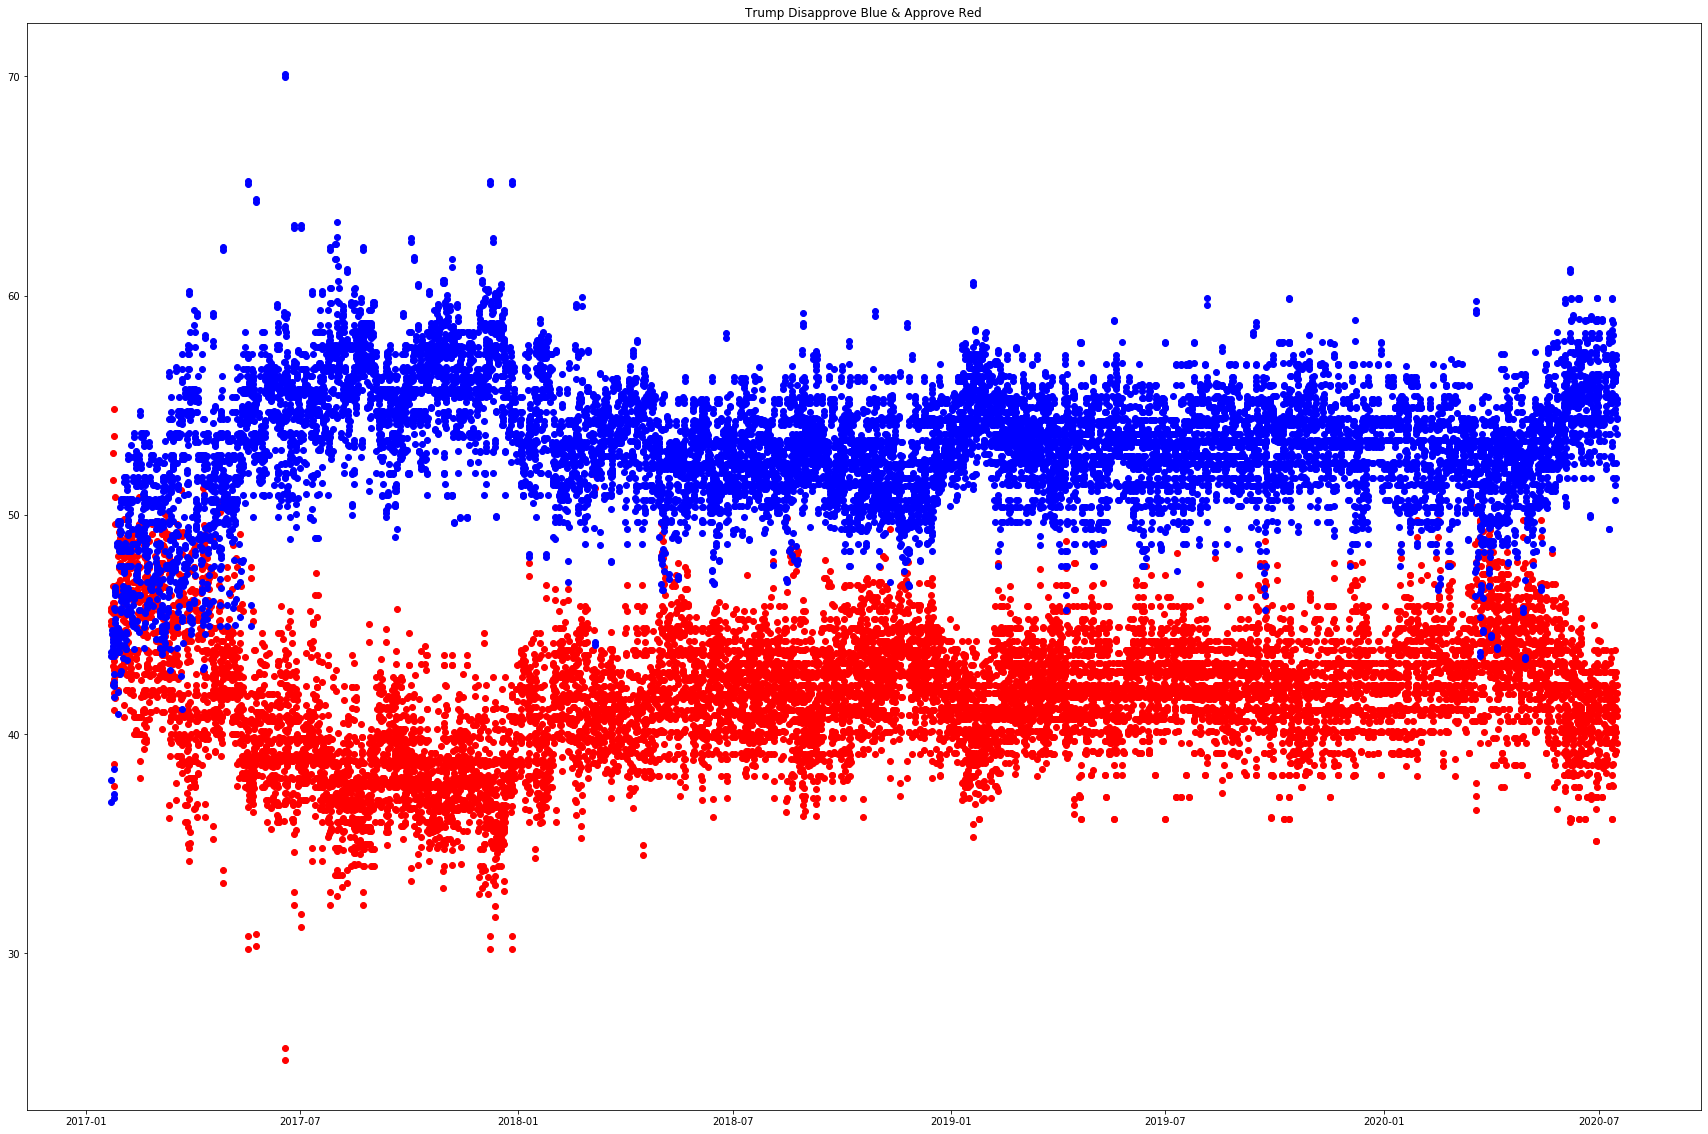

In [4]:
plt.figure(figsize=(30,20))
plt.scatter(x = trump_ratings['enddate'], y = trump_ratings['adjusted_approve'], c='red')
plt.scatter(x = trump_ratings['enddate'], y = trump_ratings['adjusted_disapprove'], c='blue')
plt.title('Trump Disapprove Blue & Approve Red')

plt.show()

<Figure size 2160x1440 with 0 Axes>

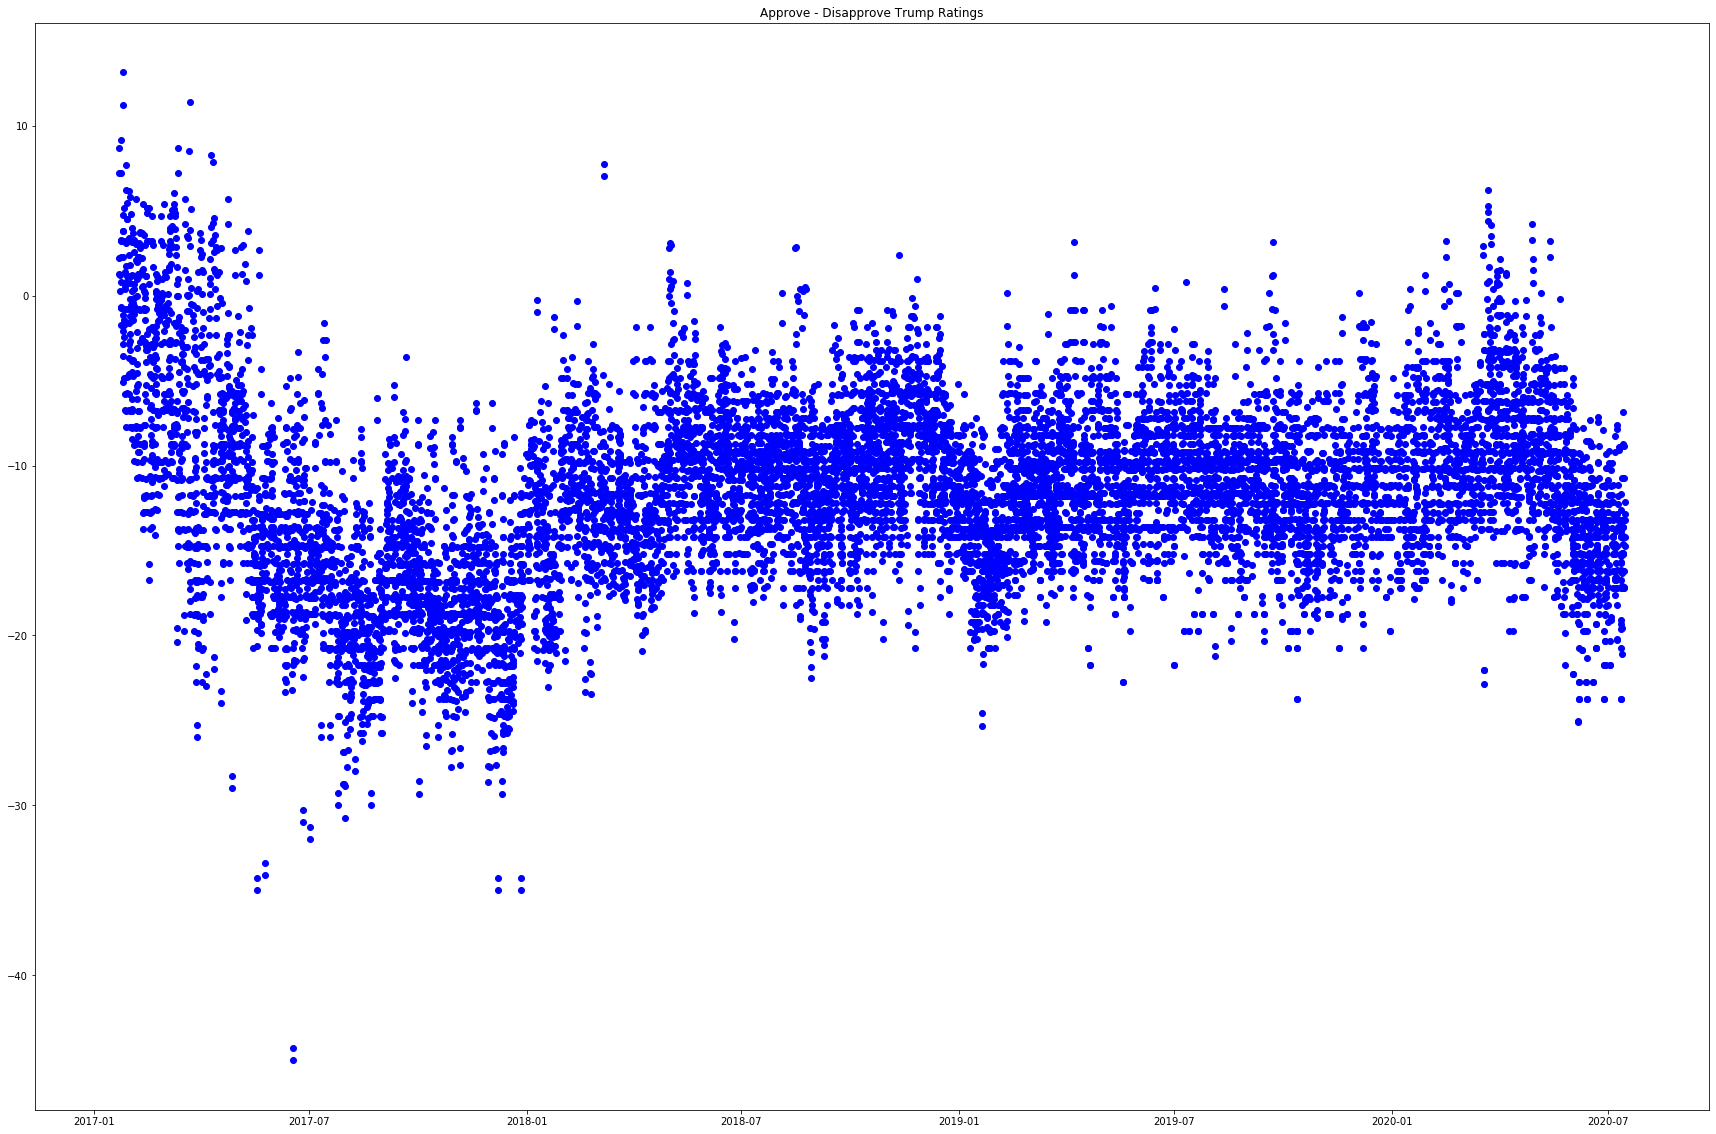

In [5]:
plt.figure(figsize=(30,20))
plt.figure(figsize=(30,20))
plt.scatter(x = trump_ratings['enddate'], y = (trump_ratings['adjusted_approve'] - trump_ratings['adjusted_disapprove']), c='blue')
plt.title('Approve - Disapprove Trump Ratings')

plt.show()

plt.show()

In [6]:
trump_sorted = trump_ratings.groupby('enddate').aggregate({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
trump_sorted.index = pd.to_datetime(trump_sorted.index, unit='s')
trump_sorted

,adjusted_approve,adjusted_disapprove
enddate,,
2017-01-22,45.373756,40.529575
2017-01-23,45.377826,44.648448
2017-01-24,46.235906,43.702975
2017-01-25,44.284402,41.993271
2017-01-26,45.607006,46.012863
...,...,...
2020-07-12,39.979799,56.477837
2020-07-13,40.762214,55.909417
2020-07-14,40.948665,54.881739


In [7]:
trump_weekly_approve = trump_sorted['adjusted_approve'].resample('W', ).mean()
trump_weekly_disapprove = trump_sorted['adjusted_disapprove'].resample('W', ).mean()
trump_weekly_disapprove

enddate
2017-01-22    40.529575
2017-01-29    44.857060
2017-02-05    47.484225
2017-02-12    48.793869
2017-02-19    49.813858
                ...    
2020-06-21    55.873390
2020-06-28    55.381556
2020-07-05    55.718349
2020-07-12    55.005278
2020-07-19    55.080717
Freq: W-SUN, Name: adjusted_disapprove, Length: 183, dtype: float64

In [8]:
trump_weekly = pd.merge(trump_weekly_approve, trump_weekly_disapprove, left_on='enddate', right_on='enddate').reset_index()
trump_weekly

,enddate,adjusted_approve,adjusted_disapprove
0,2017-01-22,45.373756,40.529575
1,2017-01-29,45.489185,44.857060
2,2017-02-05,45.597309,47.484225
3,2017-02-12,45.461622,48.793869
4,2017-02-19,44.543586,49.813858
...,...,...,...
178,2020-06-21,40.535744,55.873390
179,2020-06-28,40.915964,55.381556
180,2020-07-05,40.369681,55.718349
181,2020-07-12,41.142716,55.005278


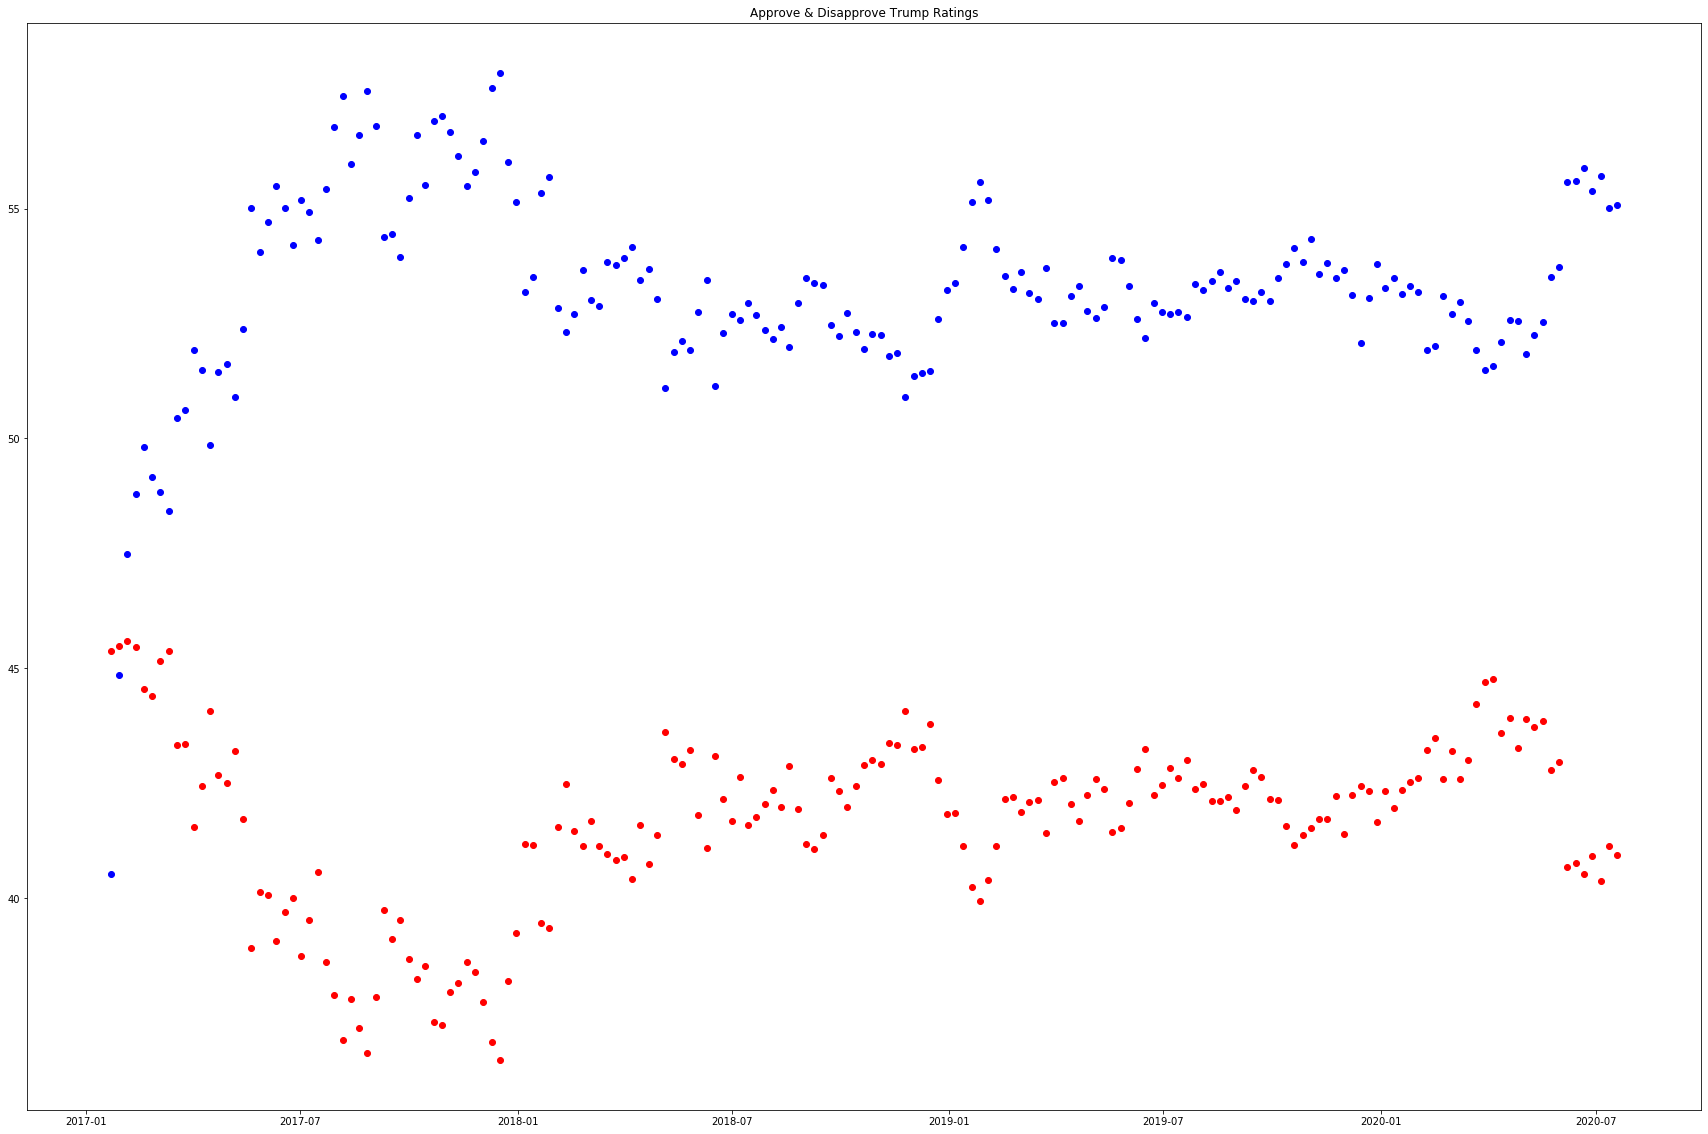

In [9]:
plt.figure(figsize=(30,20))
plt.scatter(x = trump_weekly['enddate'], y = trump_weekly['adjusted_approve'], c='red')
plt.scatter(x = trump_weekly['enddate'], y = trump_weekly['adjusted_disapprove'], c='blue')
plt.title('Approve & Disapprove Trump Ratings')
plt.show()


In [10]:
trump_weekly.describe(include='all')

,enddate,adjusted_approve,adjusted_disapprove
count,183,183.000000,183.000000
unique,183,NaN,NaN
top,2020-07-05 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,2017-01-22 00:00:00,NaN,NaN
last,2020-07-19 00:00:00,NaN,NaN
mean,NaN,41.644459,53.239939
std,NaN,1.895540,2.086993
min,NaN,36.474552,40.529575
25%,NaN,40.901674,52.340097


In [11]:
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

In [12]:
us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
173,2020-07-12,3318347,134977
174,2020-07-13,3379859,135402
175,2020-07-14,3445483,136356
176,2020-07-15,3513846,137327


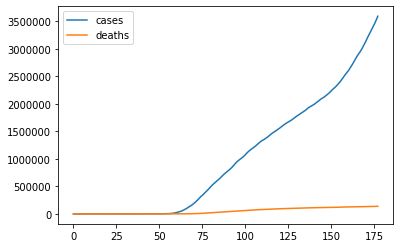

In [13]:
us.plot()

In [14]:
# Convert to date time

us.index = pd.to_datetime(us['date']).reset_index(drop=True)
us.drop(columns={'date'})



,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0
...,...,...
2020-07-12,3318347,134977
2020-07-13,3379859,135402
2020-07-14,3445483,136356


In [15]:
#Resample by week
us_weekly = us[['cases', 'deaths']].resample('W', ).mean()
us_weekly

trump_covid_weeks = trump_weekly[-26:]
trump_covid_weeks

,enddate,adjusted_approve,adjusted_disapprove
157,2020-01-26,42.519848,53.322568
158,2020-02-02,42.608594,53.187860
159,2020-02-09,43.220550,51.920645
160,2020-02-16,43.494213,52.001329
161,2020-02-23,42.599587,53.105975
162,2020-03-01,43.195571,52.716095
163,2020-03-08,42.583414,52.977333
164,2020-03-15,43.007764,52.556184
165,2020-03-22,44.215007,51.919535
166,2020-03-29,44.707252,51.500045


The r-squared is: 0.5010092380776222


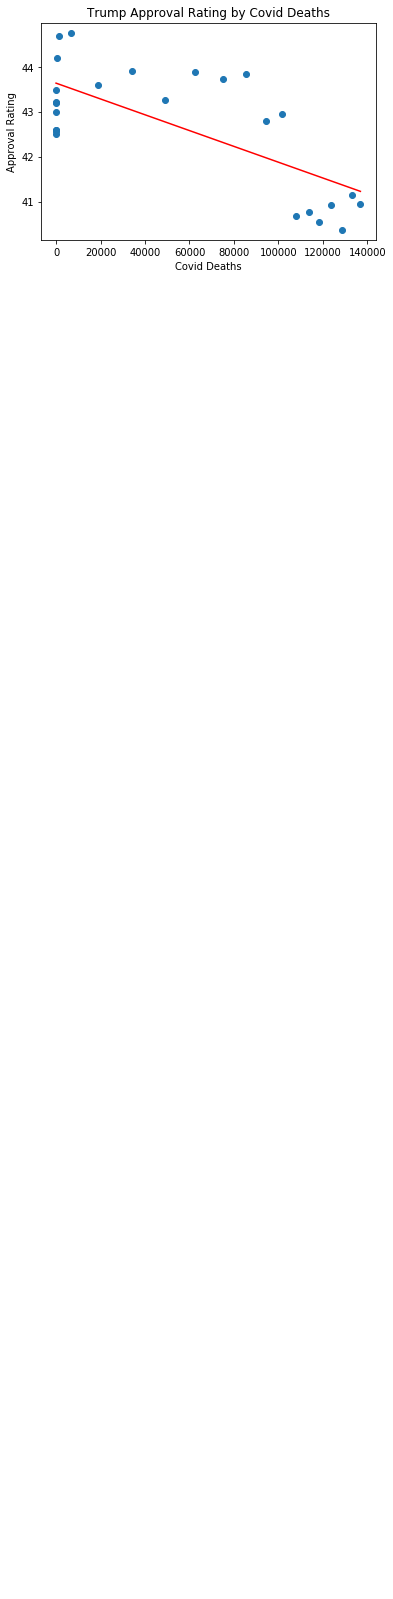

In [16]:
x_values = us_weekly['deaths']
y_values = trump_covid_weeks['adjusted_approve']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Deaths')
plt.ylabel('Approval Rating')
print(f"The r-squared is: {rvalue**2}")
plt.title('Trump Approval Rating by Covid Deaths')
plt.show()

The r-squared is: 0.5270430515297485


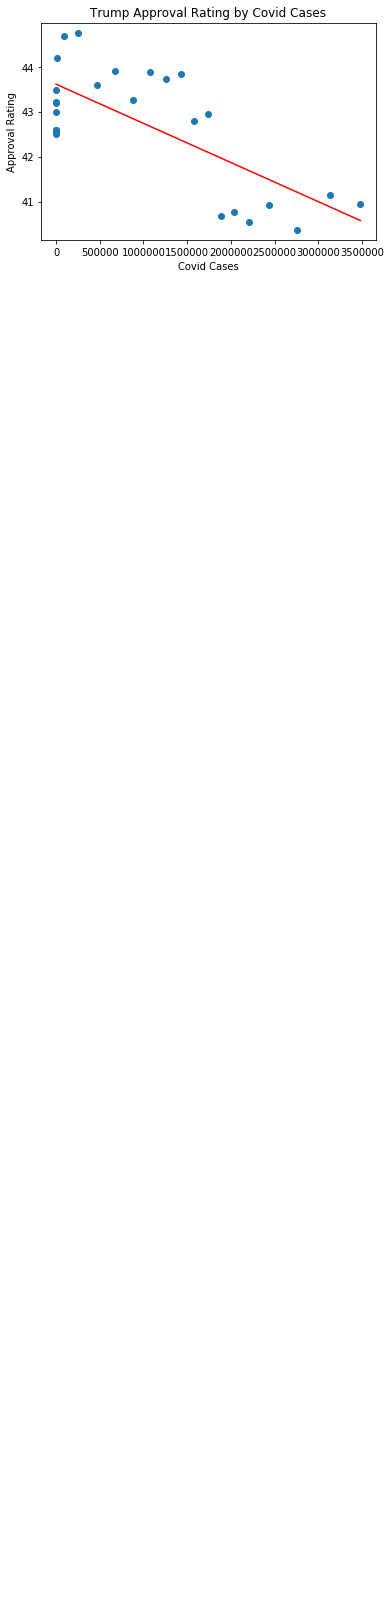

In [17]:
x_values = us_weekly['cases']
y_values = trump_covid_weeks['adjusted_approve']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Cases')
plt.ylabel('Approval Rating')
plt.title('Trump Approval Rating by Covid Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [18]:
# Download the congressional ballot and convert index to datetime so it can be resampled by week.

congressional_ballot = "approval_ratings/generic_polllist.csv"
general_ballot = pd.read_csv(congressional_ballot)
general_ballot.drop(columns={'subgroup', 'modeldate', 'startdate'}, inplace=True)
general_ballot.index = pd.to_datetime(general_ballot['enddate']).reset_index(drop=True)
general_ballot.drop(columns={'enddate'})
general_ballot

,enddate,pollster,grade,samplesize,population,weight,influence,dem,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
enddate,,,,,,,,,,,,,,,,,,
2018-12-02,12/2/2018,Winston Group,B/C,1000,rv,0.753612,0.000000,47.0,41.0,46.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66565,124055,5/29/2020,18:00:11 17 Jul 2020
2018-12-30,12/30/2018,Winston Group,B/C,1000,rv,0.611841,0.000000,48.0,41.0,47.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66581,124115,5/29/2020,18:00:11 17 Jul 2020
2019-01-02,1/2/2019,HarrisX,C,3012,rv,0.032487,0.000000,45.0,35.0,49.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57208,92471,1/3/2019,18:00:11 17 Jul 2020
2019-01-03,1/3/2019,HarrisX,C,3012,rv,0.031667,0.000000,44.0,35.0,48.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57218,92479,1/4/2019,18:00:11 17 Jul 2020
2019-01-04,1/4/2019,HarrisX,C,3003,rv,0.030810,0.000000,43.0,36.0,47.910864,40.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57221,92483,1/5/2019,18:00:11 17 Jul 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,6/30/2020,YouGov,B,1198,rv,0.277746,0.235632,49.0,40.0,49.322521,40.841741,NaN,NaN,https://docs.cdn.yougov.com/k05rp8ded6/econTab...,66967,125049,7/1/2020,18:00:11 17 Jul 2020
2020-07-07,7/7/2020,YouGov,B,1165,rv,0.294419,0.271991,51.0,40.0,51.322521,40.841741,NaN,NaN,https://docs.cdn.yougov.com/lraqqdhd7j/econTab...,67017,125217,7/8/2020,18:00:11 17 Jul 2020
2020-07-12,7/12/2020,NBC News/The Wall Street Journal,A-,900,rv,1.359525,1.332942,47.0,43.0,46.611492,42.338398,NaN,NaN,https://assets.documentcloud.org/documents/698...,67110,125410,7/15/2020,18:00:11 17 Jul 2020


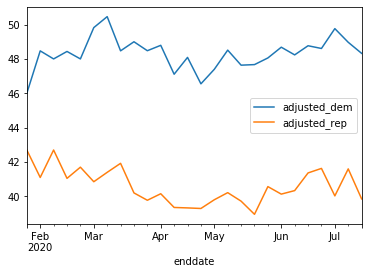

In [19]:
# Resample adjusted Democratic and Republican approval numbers by week.

general_ballot_weekly = general_ballot[['adjusted_dem', 'adjusted_rep']].resample('W', ).mean()
general_ballot_covid_weeks = general_ballot_weekly[-26:]
general_ballot_covid_weeks.plot()

The r-squared is: 0.04940765225134404


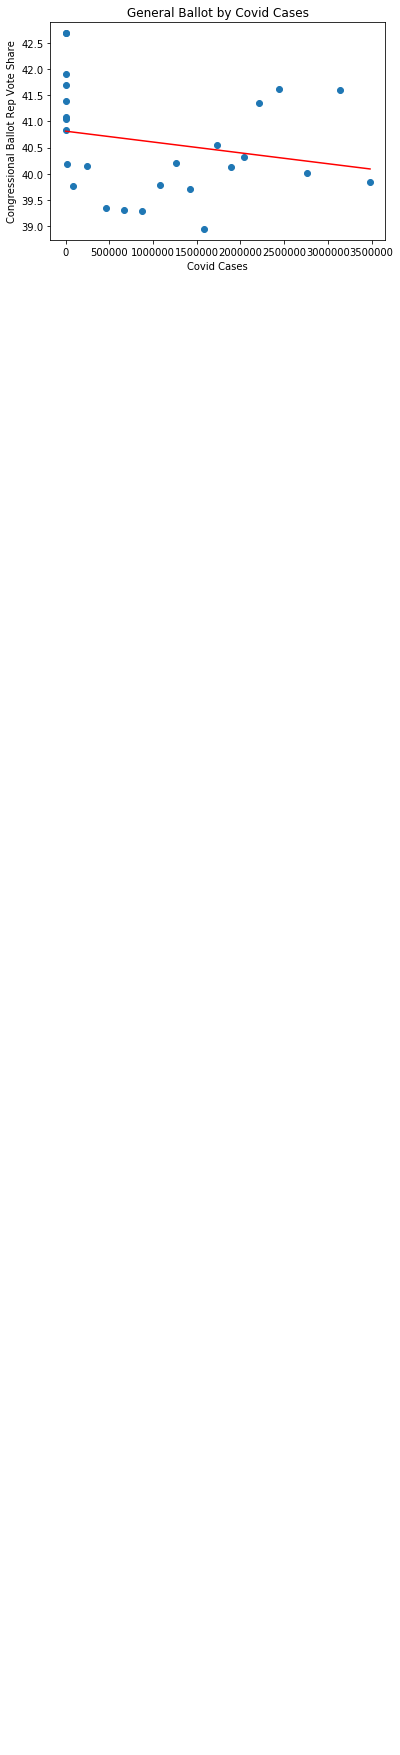

In [20]:
x_values = us_weekly['cases']
y_values = general_ballot_covid_weeks['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Cases')
plt.ylabel('Congressional Ballot Rep Vote Share')
plt.title('General Ballot by Covid Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06668568957703314


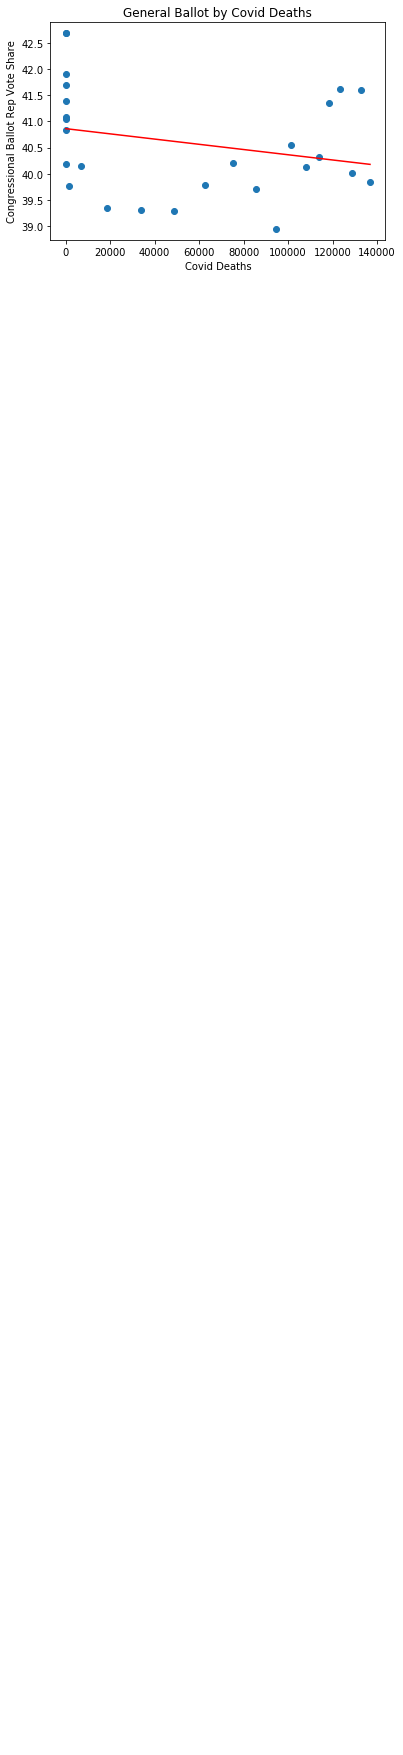

In [21]:
x_values = us_weekly['deaths']
y_values = general_ballot_covid_weeks['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Deaths')
plt.ylabel('Congressional Ballot Rep Vote Share')
plt.title('General Ballot by Covid Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Trump T-Test Rating

As a rough guide, we trie to estimate the statistical significance of the changes of covid on Trump approval rating since the Spring. A t-test seemed like a genearl guide that could give some light on the statistical significance of changes. However, the obvious problem in a one sample test is that the hypothesized mean or comparison is highly conjectural. A way around this is to compare Trump approval ratings before January 21st when our survey of covid impact agains with Trump's ratings after. This is still a relative scale, but it can give a picture of how significant these approval changes are relative to the average mean and changes in Trump's previous ratings.

In [29]:
trump_ratings.index = pd.to_datetime(trump_ratings['enddate']).reset_index(drop=True)
trump_ratings
trump_pre_covid_ratings = trump_ratings.loc[(trump_ratings['enddate'] < '2020-1-21') & (trump_ratings['enddate'] > '2018-1-21')]
trump_post_covid_ratings = trump_ratings.loc[trump_ratings['enddate']>= '2020-1-21']
trump_pre_covid_ratings.describe()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,7539.000000,7539.000000,7539.0,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000
mean,2027.321064,0.344641,0.0,43.095318,53.021143,42.026742,53.047618,56966.881682,94224.495291
std,2647.750776,0.488948,0.0,3.155851,2.443213,2.055401,1.980164,3418.880655,9777.154899
min,359.000000,0.000000,0.0,33.000000,43.000000,34.463853,44.070862,50832.000000,80305.000000
25%,1000.000000,0.110724,0.0,41.000000,51.000000,40.678542,51.697241,53821.500000,86608.500000
50%,1500.000000,0.125941,0.0,43.000000,53.000000,42.022312,53.089118,57401.000000,92875.000000
75%,2200.000000,0.231818,0.0,45.000000,55.000000,43.249205,54.319077,58647.000000,99304.500000
max,55372.000000,3.053792,0.0,53.000000,65.000000,51.800086,60.640807,67042.000000,125264.000000


In [30]:
# There are several ways to perform this operation, but we chose a simple indepedent t-test to get an approximate metric of the two approval ratings sections.

from scipy.stats import ttest_ind

sample1 = trump_pre_covid_ratings['adjusted_approve']
sample2 = trump_post_covid_ratings['adjusted_disapprove']

ttest_ind(sample2, sample1, equal_var=False)

Ttest_indResult(statistic=175.8090030368993, pvalue=0.0)

In [31]:
trump_post_covid_ratings.describe()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,1492.730635,0.414855,0.020369,43.546145,52.934526,42.768599,53.254659,65654.119493,121795.156938
std,2394.428684,0.544438,0.096368,2.901113,2.882500,2.509370,2.527683,1142.093271,2768.147455
min,500.000000,0.049606,0.000000,35.000000,43.000000,35.136218,43.418474,63323.000000,115964.000000
25%,1000.000000,0.116898,0.000000,42.000000,51.000000,41.135643,51.745172,64813.000000,119973.750000
50%,1100.000000,0.145086,0.000000,43.000000,53.000000,42.821395,53.283870,65866.000000,121904.000000
75%,1500.000000,0.480838,0.000000,45.000000,55.000000,44.382570,54.901041,66731.500000,124496.250000
max,53106.000000,3.853043,1.360365,54.000000,64.600000,51.346529,61.224146,67120.000000,125426.000000


In [35]:
trump_ratings.head(25)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
enddate,,,,,,,,,,,,,,,,,,,,,
2017-01-22,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
2017-01-22,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2017-01-24,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-24,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
2017-01-23,Donald Trump,All polls,7/17/2020,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
2017-01-25,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-25,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53
2017-01-24,Donald Trump,All polls,7/17/2020,1/22/2017,2017-01-24,Gallup,B,1500.0,a,0.227380,...,45.0,46.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,7/17/2020 9:53
2017-01-25,Donald Trump,All polls,7/17/2020,1/21/2017,2017-01-25,Ipsos,B-,1651.0,a,0.141531,...,45.8,43.322312,44.465379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,7/17/2020 9:53
2017-01-24,Donald Trump,All polls,7/17/2020,1/22/2017,2017-01-24,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200411,...,43.0,51.591958,44.355536,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,7/17/2020 9:53
2017-01-26,Donald Trump,All polls,7/17/2020,1/22/2017,2017-01-26,Ipsos,B-,1678.0,a,0.132882,...,46.4,43.622312,45.065379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49424,77597,3/1/2017,7/17/2020 9:53


In [53]:
ipsos = trump_ratings.loc[trump_ratings['pollster']=='Ipsos']
gallup = trump_ratings.loc[trump_ratings['pollster']=='Gallup']
morning_consult = trump_ratings.loc[trump_ratings['pollster']=='Gallup']
rasmussen = trump_ratings.loc[trump_ratings['pollster']=='Rasmussen Reports/Pulse Opinion Research']
yougov = trump_ratings.loc[trump_ratings['pollster']=='YouGov']
survey_monkey = trump_ratings.loc[trump_ratings['pollster']=='SurveyMonkey']
public_policy = trump_ratings.loc[trump_ratings['pollster']=='Public Policy Polling']
harrisx = trump_ratings.loc[trump_ratings['pollster']=='HarrisX']
quinnipiac = trump_ratings.loc[trump_ratings['pollster']=='Quinnipiac University']





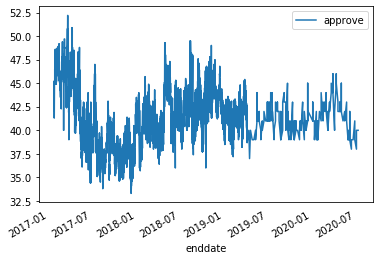

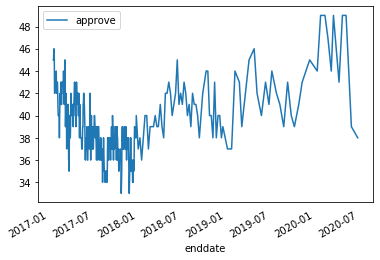

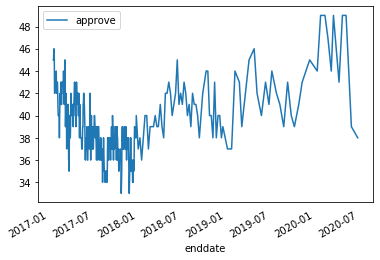

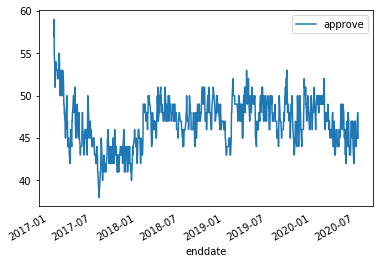

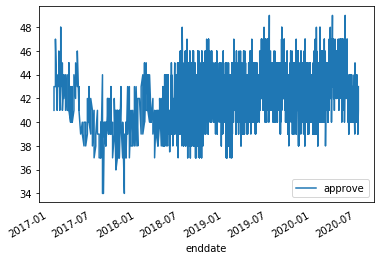

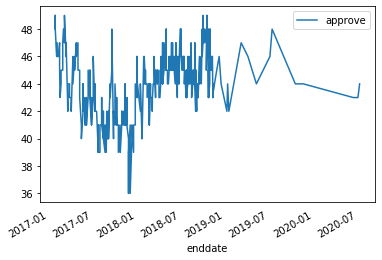

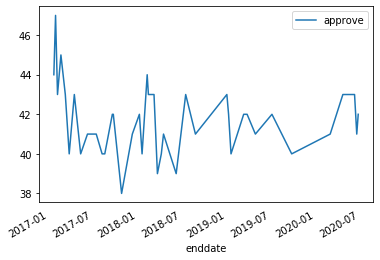

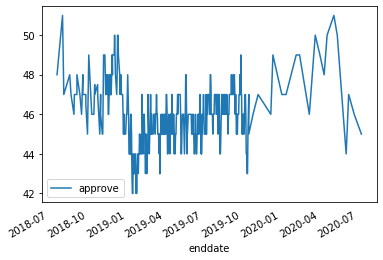

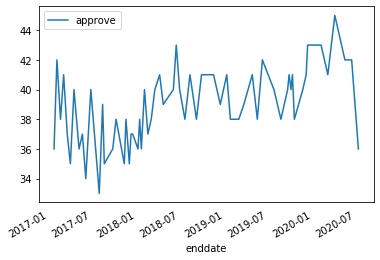

In [63]:
ipsos.plot(y='approve', x='enddate')
gallup.plot(y='approve', x='enddate')
morning_consult.plot(y='approve', x='enddate')
rasmussen.plot(y='approve', x='enddate')
yougov.plot(y='approve', x='enddate')
survey_monkey.plot(y='approve', x='enddate')
public_policy.plot(y='approve', x='enddate')
harrisx.plot(y='approve', x='enddate')
quinnipiac.plot(y='approve', x='enddate');

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

# Gradient Descent
## Data: 
This is our input data that we are going to learn from. This data includes both the data points (e.x., feature vectors, color histograms, raw pixel intensities, etc.) and their associated class labels.
## Score function: 
A function that accepts our data as input and maps the data to class labels. For instance, given our input feature vectors, the score function takes these data points, applies some function f (our score function), and then returns the predicted class labels.
## Loss function: 
A loss function quantifies how well our predicted class labels agree with our ground-truth labels. The higher level of agreement between these two sets of labels, the lower our loss (and higher our classification accuracy, at least on the training data). Our goal is to minimize our loss function, thereby increasing our classification accuracy.
## Weight matrix: 
The weight matrix, typically denoted as W, is called the weights or parameters of our classifier that we’ll actually be optimizing. Based on the output of our score function and loss function, we’ll be tweaking and fiddling with the values of our weight matrix to increase classification accuracy.

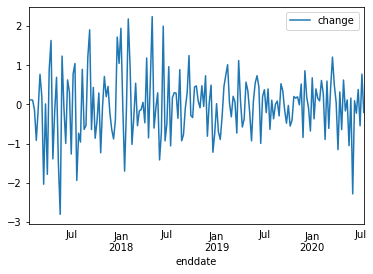

In [91]:
trump_change = trump_weekly['adjusted_approve'] - trump_weekly['adjusted_approve'].shift()
trump_change
trump_weekly['change'] = trump_change
trump_weekly
trump_weekly.plot('enddate', 'change')

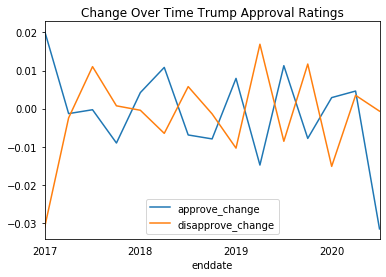

In [144]:
trump_day_changes = trump_ratings['adjusted_approve'].shift() - trump_ratings['adjusted_approve']
trump_ratings['approve_change'] = trump_day_changes
trump_ratings['disapprove_change'] = trump_ratings['adjusted_disapprove'].shift() - trump_ratings['adjusted_disapprove']
resampled_ratings = trump_ratings.resample('Q', ).mean().reset_index()
resampled_ratings.plot(y=['approve_change', 'disapprove_change'],  x='enddate', title='Change Over Time Trump Approval Ratings');
